In [13]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

import spacy
from spacy import displacy

import pandas as pd
pd.set_option('max_colwidth', 1000)

import os

os.sys.path.insert(0, '../script')

from webnlg import WebNLGCorpus
from matplotlib import pyplot as plt
import networkx as nx

In [5]:
nlp = spacy.load('en_core_web_lg')

In [2]:
train_dev = WebNLGCorpus.load(['train', 'dev'])

In [64]:
s = train_dev.sample(ntriples=1)
s

Triple info: category=Food eid=Id270

	Modified triples:

United_States | leaderName | Paul_Ryan


	Lexicalizations:

Paul Ryan is a leader in United States.


United States leader is called Paul Ryan.


Paul Ryan is a leader in the U.S.


In [66]:
[[d.text, d.dep_, d.pos_, d.head] for d in doc]

[['Paul', 'compound', 'PROPN', Ryan],
 ['Ryan', 'nsubj', 'PROPN', is],
 ['is', 'ROOT', 'VERB', is],
 ['a', 'det', 'DET', leader],
 ['leader', 'attr', 'NOUN', is],
 ['in', 'prep', 'ADP', leader],
 ['United', 'compound', 'PROPN', States],
 ['States', 'pobj', 'PROPN', in],
 ['.', 'punct', 'PUNCT', is]]

In [67]:
?nx.*layout

In [77]:
a = list(doc)[1]

In [78]:
a.i

1

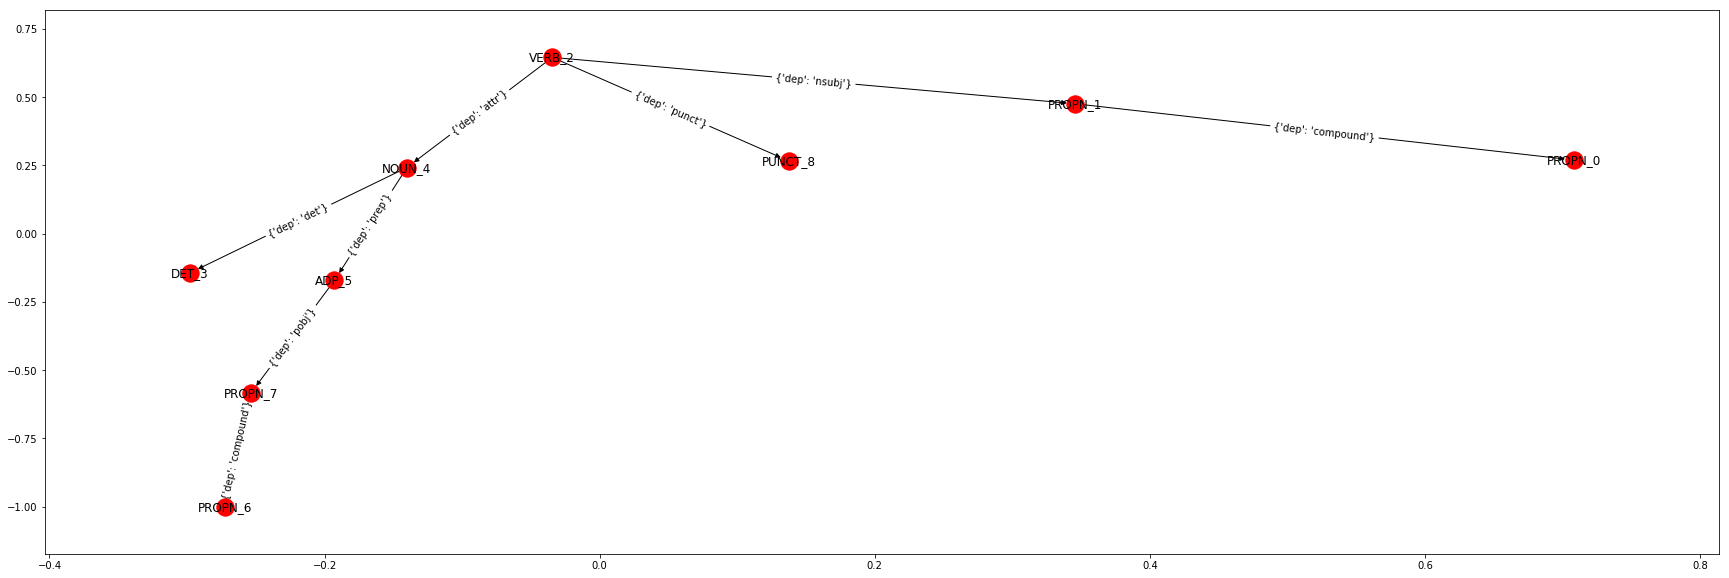

In [79]:
doc = nlp(s.lexes()[0])

g = nx.MultiDiGraph()

for token in doc:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge('{}_{}'.format(token.head.pos_, token.head.i), '{}_{}'.format(token.pos_, token.i), dep=token.dep_)
        
_, _ = plt.subplots(1, 1, figsize=(30, 10))
pos = nx.kamada_kawai_layout(g)
_ = nx.draw_networkx_edges(g, pos)
_ = nx.draw_networkx_nodes(g, pos, cmap=plt.get_cmap('jet'), node_size = 300)
_ = nx.draw_networkx_labels(g, pos)
_ = nx.draw_networkx_edge_labels(g, pos)

In [3]:
train_dev.mdf[train_dev.mdf.m_predicate == 'related'].sample(2)

e1 = train_dev.sample(idx='5_40')
e2 = train_dev.sample(idx='13_0')

In [4]:
e1.lexes()

['The alternative name for asam pedas is asam padeh.',
 'Asam padeh is also known as Asam pedas.',
 'An alternative name for Asam pedas is Asam padeh.']

In [5]:
e2.lexes()

['Garlic is an ingredient used in Ajoblanco which originates from the country of Spain.',
 'Ajoblanco, containing the ingredient garlic, is from Spain.',
 "Garlic is an ingredient in the regional dish of Spain's Ajoblanco."]

In [ ]:
s1 = e1.lexes()[0]
s2 = e2.lexes()[0]

In [ ]:
doc1 = nlp(s1)
displacy.render(doc1, style='dep', jupyter=True)

In [ ]:
doc2 = nlp(s2)
displacy.render(doc2, style='dep', jupyter=True)

In [ ]:
import networkx as nx

g = nx.DiGraph()

for token in doc1:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text, dep=token.dep_, pos=token.pos_)

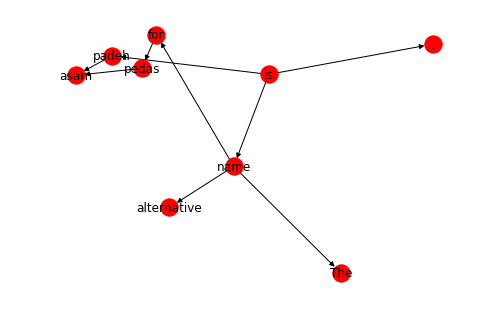

In [ ]:
nx.draw(g, with_labels=True)

In [ ]:
g = nx.DiGraph()

for token in doc1:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text, dep=token.dep_, pos=token.pos_)
        
for token in doc2:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text, dep=token.dep_, pos=token.pos_)

degree centrality

In [ ]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)

[('is', 0.23809523809523808),
 ('name', 0.19047619047619047),
 ('ingredient', 0.19047619047619047),
 ('originates', 0.14285714285714285),
 ('country', 0.14285714285714285),
 ('for', 0.09523809523809523),
 ('pedas', 0.09523809523809523),
 ('asam', 0.09523809523809523),
 ('padeh', 0.09523809523809523),
 ('used', 0.09523809523809523),
 ('in', 0.09523809523809523),
 ('from', 0.09523809523809523),
 ('of', 0.09523809523809523),
 ('The', 0.047619047619047616),
 ('alternative', 0.047619047619047616),
 ('.', 0.047619047619047616),
 ('Garlic', 0.047619047619047616),
 ('an', 0.047619047619047616),
 ('Ajoblanco', 0.047619047619047616),
 ('which', 0.047619047619047616),
 ('the', 0.047619047619047616),
 ('Spain', 0.047619047619047616)]

PageRank

In [ ]:
sorted(nx.pagerank(g).items(), key=lambda x: x[1], reverse=True)

[('asam', 0.10054824943767052),
 ('Ajoblanco', 0.07427870526416332),
 ('Spain', 0.07111259508772588),
 ('country', 0.061573204486935124),
 ('pedas', 0.05631059834400176),
 ('in', 0.05631059834400176),
 ('the', 0.052583840596457765),
 ('of', 0.052583840596457765),
 ('which', 0.04136283989874518),
 ('from', 0.04136283989874518),
 ('The', 0.035171596177990996),
 ('alternative', 0.035171596177990996),
 ('for', 0.035171596177990996),
 ('an', 0.035171596177990996),
 ('used', 0.035171596177990996),
 ('originates', 0.035171596177990996),
 ('name', 0.03090560590473227),
 ('padeh', 0.03090560590473227),
 ('.', 0.03090560590473227),
 ('Garlic', 0.03090560590473227),
 ('ingredient', 0.03090560590473227),
 ('is', 0.0264150814534886)]

full graph

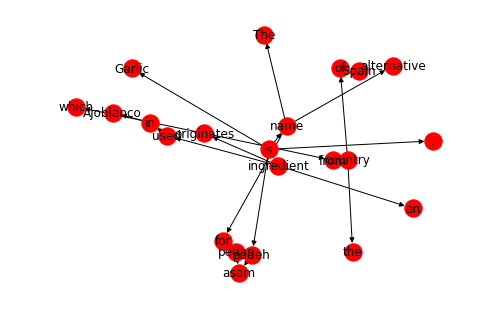

In [ ]:
nx.draw(g, with_labels=True)

In [ ]:
# Graph with all entries in train+dev datasets

In [ ]:
g = nx.DiGraph()

for lexe_set in train_dev.ldf.ltext:
    
    doc = nlp(lexe_set)
    
    for token in doc:
    
        if token.dep_ != 'ROOT':
        
            g.add_edge(token.head.text, token.text)

In [ ]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
sorted(nx.pagerank(g).items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
sorted(nx.betweenness_centrality(g).items(), key=lambda x: x[1], reverse=True)[:10]